In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [7]:
companies = pd.read_csv('C:/Users/Rinay Shah/Desktop/Machine Learning/Machine Learning Full/Linear Regression/1000_Companies.csv')
X = companies.iloc[:, :-1].values
Y = companies.iloc[:, 4].values

companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


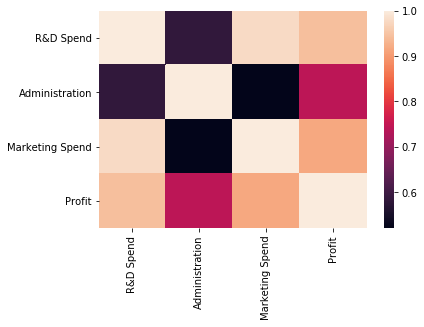

In [9]:
#Data Visualization
#Correlation matrix
sns.heatmap(companies.corr())

In [47]:
#Encoding Categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder_X = LabelEncoder()
X[:, 3] = labelencoder_X.fit_transform(X[:, 3])
transformer = ColumnTransformer([('one_hot_encoder', OneHotEncoder(), [3])],remainder='passthrough')
X = np.array(transformer.fit_transform(X), dtype=np.float)
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

In [39]:
X = X[:, 1:]

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [41]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
y_pred = regressor.predict(X_test)
y_pred

array([ 285.68897916,  276.0655375 ,  321.71177994,  898.63464263,
        246.68822603,  438.37579637,  666.01083589,  297.56535979,
        819.66757468,   34.3660117 ,  124.48876227,  721.38526255,
        547.70216549,   70.76343169,  904.81118557,  189.55320521,
        493.29334501,  813.48841936,  570.64040972,  942.97965395,
        167.7459038 ,  256.60668435,  936.1230652 ,  245.84466056,
        393.073021  ,  366.44957906,  -68.45146674,   59.44597085,
        138.22442338, 1093.09653972,  511.1533385 ,  440.4937561 ,
        374.26393212,  632.40627983,  103.45527416,  420.25969794,
        970.82646592,  868.72263633,  891.31864673,  489.22351961,
        340.69392788,  819.68400206,  412.25934138,   12.9933715 ,
        481.05358693,   65.78516297,  776.78818506,  213.05678825,
        786.0421929 ,  584.26484678,  963.56410604,  891.07033871,
        313.60241045,  210.90162046,  945.54593661,  254.83911884,
        667.28444215,  862.16454703,  253.41676189,  401.22046

In [43]:
print(regressor.coef_)

[-6.71707790e+00  1.57528576e+02  1.17905613e+02 ...  1.71805625e-03
  5.45936620e-01  3.33380857e-03]


In [44]:
print(regressor.intercept_)

-199.52453834032758


In [45]:
from sklearn.metrics import r2_score
r2_score(Y_test,y_pred)

0.9574570289618999